## Inference
To test trained models, run inference between 2 images using the model and analyze the results. Use the experiment path outputted in the training step to reference the location where the configurations and checkpoints that are to be used for testing

In [17]:
import inference
import matplotlib.pyplot as plt

import kornia as K
import kornia.feature as KF
from kornia_moons.feature import *

import torch
import torch.nn as nn

#Where the images to run inference on are
img0_path = 'imgs/test_images/img2.jpg'
img1_path = 'imgs/test_images/img3.jpg'

#Where the configurations and checkpoints saved during training are

#trained with DataParallelStrategy in Jupyter
#trained with cached features
experiment_path = '/host_Data/Data/MegaDepth/MegaDepth/extracted_features/phoenix3/SuperPointNet_960_720_preextracted/SuperPointNet_cache__attn_softmax__laf_none__2022-06-15-21-32-49'

#trained without cached features
#experiment_path = '/host_Data/Data/MegaDepth/MegaDepth/extracted_features/phoenix3/Superpoint_960_720/SuperPointNet__attn_softmax__laf_none__2022-06-15-21-43-06'

#trained with DDPStrategy in non-interactive openglue environment, inference works after correcting incorrectly loaded local_features_extractor weights and biases from statedict
#experiment_path = '/host_Data/Data/MegaDepth/MegaDepth/extracted_features/phoenix3/SuperPointNet__attn_softmax__laf_none__2022-06-14-23-32-09'

#name of the checkpoint file stored in the experiment path directory
checkpoint_name = 'superglue-step=500.ckpt'

#which device to use to run inference (cuda or cpu)
device = 'cpu'

#output location
output_dir = 'results.png'

- Config.yaml in 'experiment_path' directory
    - Under superglue:
        - If unset, add 'descriptor_dim: <dim>' where <dim> is the same as the corresponding field in features_config.yaml in the same folder (usually 256)
        - Under positional_encoding:
            - If unset, add and set 'output_size: ' to the same value
        - Under attention_gnn:
            - If unset, add and set 'embed_dim: ' to the same value
   
   

<All keys matched successfully>
<All keys matched successfully>


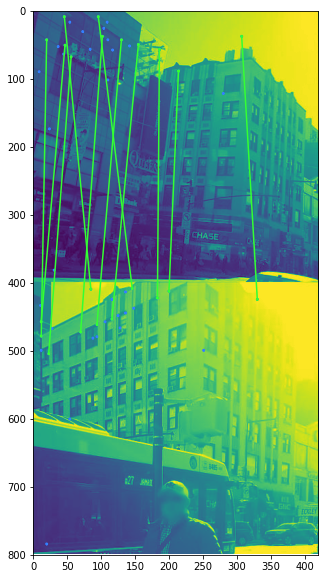

In [18]:
'''From inference.py
    Modified to use direct variable input rather than command line arguments
'''


img0, img1, lafs0, lafs1, inliers = inference.run_inference(img0_path, img1_path, experiment_path, checkpoint_name, device)
draw_LAF_matches(
    lafs0,
    lafs1,
    torch.arange(len(inliers)).view(-1, 1).repeat(1, 2),
    K.tensor_to_image(img0),
    K.tensor_to_image(img1),
    inliers,
    draw_dict={'inlier_color': (0.2, 1, 0.2),
               'tentative_color': None,
               'feature_color': (0.2, 0.5, 1), 'vertical': True})
plt.savefig(output_dir)